In [19]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [28]:
with open(r"D:\\Sarcasm_Headlines_Dataset.json", 'r') as f:
    datastore =[ json.loads(line) for line in f.readlines()]

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [29]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [30]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [31]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6744 - accuracy: 0.5706 - val_loss: 0.6226 - val_accuracy: 0.7731 - 5s/epoch - 9ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4600 - accuracy: 0.8176 - val_loss: 0.3985 - val_accuracy: 0.8238 - 4s/epoch - 6ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3197 - accuracy: 0.8712 - val_loss: 0.3552 - val_accuracy: 0.8523 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2653 - accuracy: 0.8955 - val_loss: 0.3454 - val_accuracy: 0.8551 - 4s/epoch - 6ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2296 - accuracy: 0.9100 - val_loss: 0.3436 - val_accuracy: 0.8550 - 4s/epoch - 6ms/step
Epoch 6/30
625/625 - 4s - loss: 0.2005 - accuracy: 0.9257 - val_loss: 0.3515 - val_accuracy: 0.8524 - 4s/epoch - 6ms/step
Epoch 7/30
625/625 - 4s - loss: 0.1796 - accuracy: 0.9323 - val_loss: 0.3624 - val_accuracy: 0.8538 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 4s - loss: 0.1595 - accuracy: 0.9426 - val_loss: 0.3750 - val_accuracy: 0.8542 - 4s/epoch - 6ms/step
Epoch 9/30
625/625 - 4s 

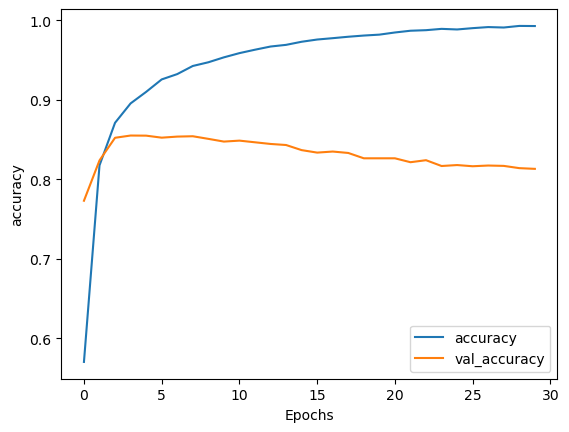

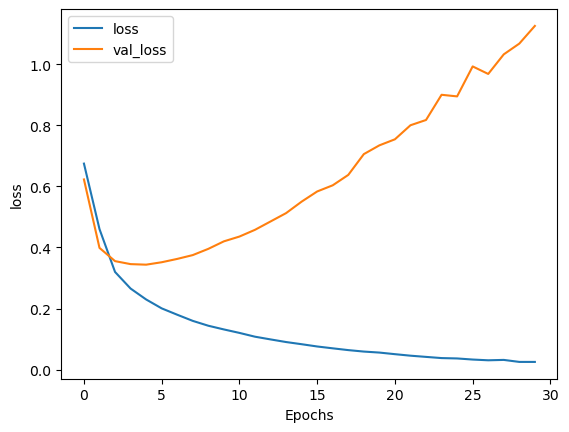

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")